In [16]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

Read the csv file `heart_failure_clinical_records_dataset.csv` into a DataFrame, print the shape, and show the head.

In [17]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(df.shape)
df.head()

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


This is a dataset of 299 patients with heart failure collected in 2015.

Source: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

Attribute Information:

- **age**: age of the patient (years)
- **anaemia**: decrease of red blood cells or hemoglobin (boolean)
- **high blood pressure**: if the patient has hypertension (boolean)
- **creatinine phosphokinase** (CPK): level of the CPK enzyme in the blood (mcg/L)
- **diabetes**: if the patient has diabetes (boolean)
- **ejection fraction**: percentage of blood leaving the heart at each contraction (percentage)
- **platelets**: platelets in the blood (kiloplatelets/mL)
- **sex**: woman or man (binary)
- **serum creatinine**: level of serum creatinine in the blood (mg/dL)
- **serum sodium**: level of serum sodium in the blood (mEq/L)
- **smoking**: if the patient smokes or not (boolean)
- **time**: follow-up period (days)
- [target] **death event**: if the patient deceased during the follow-up period (boolean)



### Task 1

Find the counts of `DEATH_EVENT` values. This tells us how many patients were survived (`DEATH_EVENT`=0) and how many were deceased (`DEATH_EVENT`=1).

In [18]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

### Task 2

Find the correlation of `DEATH_EVENT` with each of the following attributes:
`age`, `creatinine_phosphokinase`, `ejection_fraction`, `platelets`, `serum_creatinine`, and `serum_sodium`. 

What are the two attributes that have the strongest correlation (positive or negative) with `DEATH_EVENT`?

In [21]:
corr_of_DE=df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']].corrwith(df['DEATH_EVENT'])

In [22]:
print(corr_of_DE)

age                         0.253729
creatinine_phosphokinase    0.062728
ejection_fraction          -0.268603
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
dtype: float64


In [7]:
#-0.268 the strongest negative correlation of 'ejection_fraction' with 'DEATH_EVENT'
# 0.294 the strongest positive correlation of 'serum_creatinine' with 'DEATH_EVENT'

### Task 3

Create two subsets, one for survived patients (call it `df1`), and the other for deceased patients (call it `df2`), then print the shape of each.

In [24]:
df1=df[df['DEATH_EVENT']==0]
df2=df[df['DEATH_EVENT']==1]
print(df1.shape)
print(df2.shape)

(203, 13)
(96, 13)


The following code will show a visualization that compares the two categories in terms of the six attributes: 

In [25]:
attributes = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 
              'platelets', 'serum_creatinine', 'serum_sodium']

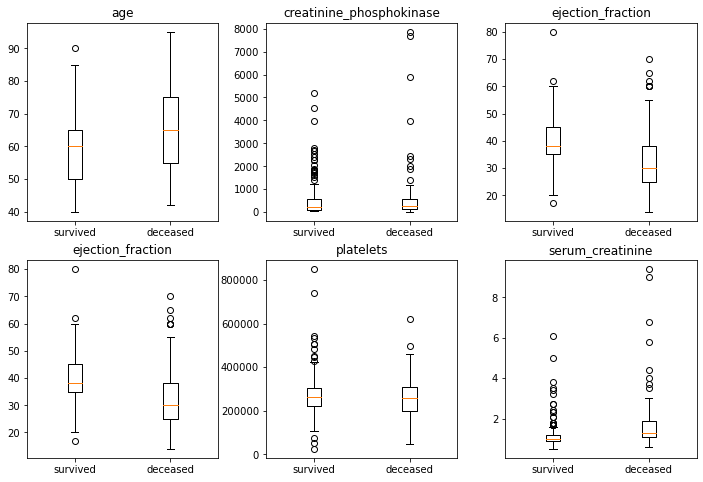

In [26]:
fig, axs = plt.subplots(2,3, figsize=(12,8))
for i in range(2):
    for j in range(3):
        k = 2*i+j
        attr = attributes[k]
        ax = axs[i,j]
        ax.boxplot([df1[attr], df2[attr]]);
        ax.set_title(attr)
        ax.set_xticklabels(['survived', 'deceased'])
plt.subplots_adjust(wspace=.25)        

### Task 4

Perform a t-test to examine a hypothesis that says: the average age of deceased patients is greater than 60 years, with a 99% confidence level.

* $H_0 : \mu \leq 60$
* $H_a : \mu > 60$

First select the suitable sample, and set the significance level.
Then, choose which function and parameters should you use for the t-test.
Finally, compare the p-value to the significance level and make the decision, and interpret it.

In [27]:
X = df[df['DEATH_EVENT']==1]['age']
print(len(X), X.mean())


alpha = 0.01  

tstat, pval =  stats.ttest_1samp(a=X, popmean=60, alternative='greater')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

96 65.21528125
p-value 0.00010088512548265157
We reject the null hypothesis


### Task 5

Perform a t-test to examine the hypothesis that says: the average platelets is different for survived patients from deceased patients.

In [28]:
A = df[df['DEATH_EVENT']==1]['platelets']
B =df[df['DEATH_EVENT']==0]['platelets']
print(A.mean(), B.mean())

alpha = 0.01  # level of significance

tstat, pval = stats.ttest_ind(a=A, b=B, alternative='two-sided')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

256381.0447916667 266657.4899014779
p-value 0.3971941540413678
We fail to reject the null hypothesis


### Task 7

Perform a t-test to examine the hypothesis that the average serum creatinine is lower for survived patients than for deceased patients. 

In [29]:
A=df[df['DEATH_EVENT']==1]['serum_creatinine']
B=df[df['DEATH_EVENT']==0]['serum_creatinine']

print(A.mean(), B.mean())

alpha = 0.01  # level of significance

tstat, pval = stats.ttest_ind(a=A, b=B, alternative='less')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

1.8358333333333332 1.184876847290641
p-value 0.9999998904901072
We fail to reject the null hypothesis


### Task 8

Find the contingency table of `smoking` and `DEATH_EVENT`.

Then, perform a chi-squared test to examine whether `DEATH_EVENT` is depenedent or independent from `smoking`. Use a 95% confidence level.

In [30]:
contingency_table = pd.crosstab(df["DEATH_EVENT"], df["smoking"])
contingency_table

smoking,0,1
DEATH_EVENT,,
0,137,66
1,66,30


In [31]:
rowsum = np.array(contingency_table.sum(axis=0)).reshape(1,-1)
colsum = np.array(contingency_table.sum(axis=1)).reshape(-1,1)
n = len(df) 
expected_values = (rowsum * colsum)/n
expected_values
no_of_rows= contingency_table.shape[0]
no_of_columns = contingency_table.shape[1]
dof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:", dof)


Degree of Freedom: 1


In [32]:
chi2stat, pval, dof, expected = stats.chi2_contingency(contingency_table)
print('chi2 stat', chi2stat)
print('p-value', pval)
print('Degree of Freedom:', dof)
print("Expected Values:\n", expected)
alpha = 0.05

if pval <= alpha:
    print('We reject the null hypothesis H0 (Categories are Dependent)')
else:
    print('We fail to reject the null hypothesis H0 (Categories are Independent)')

chi2 stat 0.007331473567119502
p-value 0.9317652998235507
Degree of Freedom: 1
Expected Values:
 [[137.82274247  65.17725753]
 [ 65.17725753  30.82274247]]
We fail to reject the null hypothesis H0 (Categories are Independent)


### Task 9

Find the contingency table of `sex` and `DEATH_EVENT`.

Then, perform a chi-squared test to examine whether `DEATH_EVENT` is depenedent or independent from `sex`. Use a 95% confidence level.

In [44]:
contingency_table = pd.crosstab(df["DEATH_EVENT"], df["sex"])
contingency_table

sex,0,1
DEATH_EVENT,,
0,71,132
1,34,62


In [33]:
rowsum = np.array(contingency_table.sum(axis=0)).reshape(1,-1)
colsum = np.array(contingency_table.sum(axis=1)).reshape(-1,1)
n = len(df) 
expected_values = (rowsum * colsum)/n
expected_values
no_of_rows= contingency_table.shape[0]
no_of_columns = contingency_table.shape[1]
dof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:", dof)

chi2stat, pval, dof, expected = stats.chi2_contingency(contingency_table)
print('chi2 stat', chi2stat)
print('p-value', pval)
print('Degree of Freedom:', dof)
print("Expected Values:\n", expected)
alpha = 0.05

if pval <= alpha:
    print('We reject the null hypothesis H0 (Categories are Dependent)')
else:
    print('We fail to reject the null hypothesis H0 (Categories are Independent)')
    

Degree of Freedom: 1
chi2 stat 0.007331473567119502
p-value 0.9317652998235507
Degree of Freedom: 1
Expected Values:
 [[137.82274247  65.17725753]
 [ 65.17725753  30.82274247]]
We fail to reject the null hypothesis H0 (Categories are Independent)


### Task 10

Find the contingency table of `smoking` and `diabetes`.

Then, perform a chi-squared test to examine whether those factors are independent from each other. Use a 95% confidence level.

In [34]:
contingency_table = pd.crosstab(df["smoking"], df["diabetes"])
contingency_table

diabetes,0,1
smoking,,
0,108,95
1,66,30


In [35]:
rowsum = np.array(contingency_table.sum(axis=0)).reshape(1,-1)
colsum = np.array(contingency_table.sum(axis=1)).reshape(-1,1)
n = len(df) 
expected_values = (rowsum * colsum)/n
expected_values
no_of_rows= contingency_table.shape[0]
no_of_columns = contingency_table.shape[1]
dof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:", dof)

chi2stat, pval, dof, expected = stats.chi2_contingency(contingency_table)
print('chi2 stat', chi2stat)
print('p-value', pval)
print('Degree of Freedom:', dof)
print("Expected Values:\n", expected)
alpha = 0.05

if pval <= alpha:
    print('We reject the null hypothesis H0 (Categories are Dependent)')
else:
    print('We fail to reject the null hypothesis H0 (Categories are Independent)')
    

Degree of Freedom: 1
chi2 stat 5.853025486358831
p-value 0.01555029458448228
Degree of Freedom: 1
Expected Values:
 [[118.13377926  84.86622074]
 [ 55.86622074  40.13377926]]
We reject the null hypothesis H0 (Categories are Dependent)


Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020).

https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5